In [1]:
import re
import os
import sys
import inspect
import pandas as pd
os.chdir("..")
from src.info_extactor import InfoExtractor
print(os.getcwd())

/home/erezsc/PycharmProjects/geocore


In [2]:
DATA_PATH = "data/test.csv"

df = pd.read_csv(DATA_PATH, index_col=0)
if "מקום" in df.columns.tolist():
    df.rename(columns={"מקום":"place"}, inplace=True)
df_topics = df[["place"]].astype("str")
os.chdir("src")
ie = InfoExtractor()

In [3]:
df_text = df["place"].astype("str")

In [4]:
df_topics["type"] = df_topics["place"].apply(lambda x: None if ie.extract_type(x) is None else ie.extract_type(x)[0])
df_topics["city"] = df_topics["place"].apply(ie.extract_city)
df_topics["city"] = df_topics["city"].apply(lambda x: None if x == '   ' else x)

In [5]:
df_topics.head()

,place,type,city
0,"מועדון ""זוזו"", שדרות רוטשילד 32, תל אביב",club,תל אביב
1,"דיור מוגן ""מגדל נופים"" רחוב הנריטה סאלד 2 ירושלים",elderly,ירושלים
2,"מועדון Sura Mare, רחוב סעדיה גאון 24, תל אביב",club,תל אביב
3,"מועדון ""Sura Mare"", רחוב סעדיה גאון 24, תל אביב",club,תל אביב
4,"אולם ""שבע"" רח' הצפירה 21, ת""א",club,None


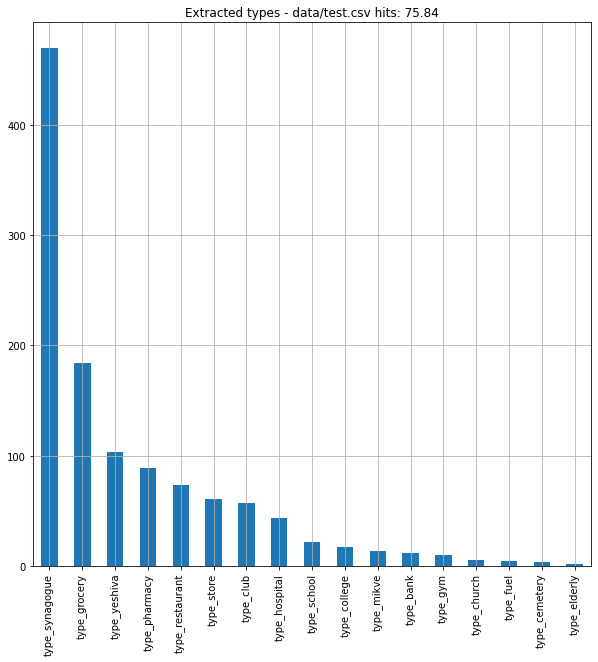

In [6]:
types_agg_df = pd.get_dummies(df_topics[["type"]]).agg("sum").sort_values(ascending=False)
total_extracted_types = types_agg_df.sum()
hit_percentage = "{:.2f}".format(total_extracted_types / len(df_topics) * 100)
types_agg_df.plot.bar(grid=True, figsize=(10,10), title="Extracted types - " + DATA_PATH + " hits: " + hit_percentage)

In [7]:
df_topics.head()

,place,type,city
0,"מועדון ""זוזו"", שדרות רוטשילד 32, תל אביב",club,תל אביב
1,"דיור מוגן ""מגדל נופים"" רחוב הנריטה סאלד 2 ירושלים",elderly,ירושלים
2,"מועדון Sura Mare, רחוב סעדיה גאון 24, תל אביב",club,תל אביב
3,"מועדון ""Sura Mare"", רחוב סעדיה גאון 24, תל אביב",club,תל אביב
4,"אולם ""שבע"" רח' הצפירה 21, ת""א",club,None


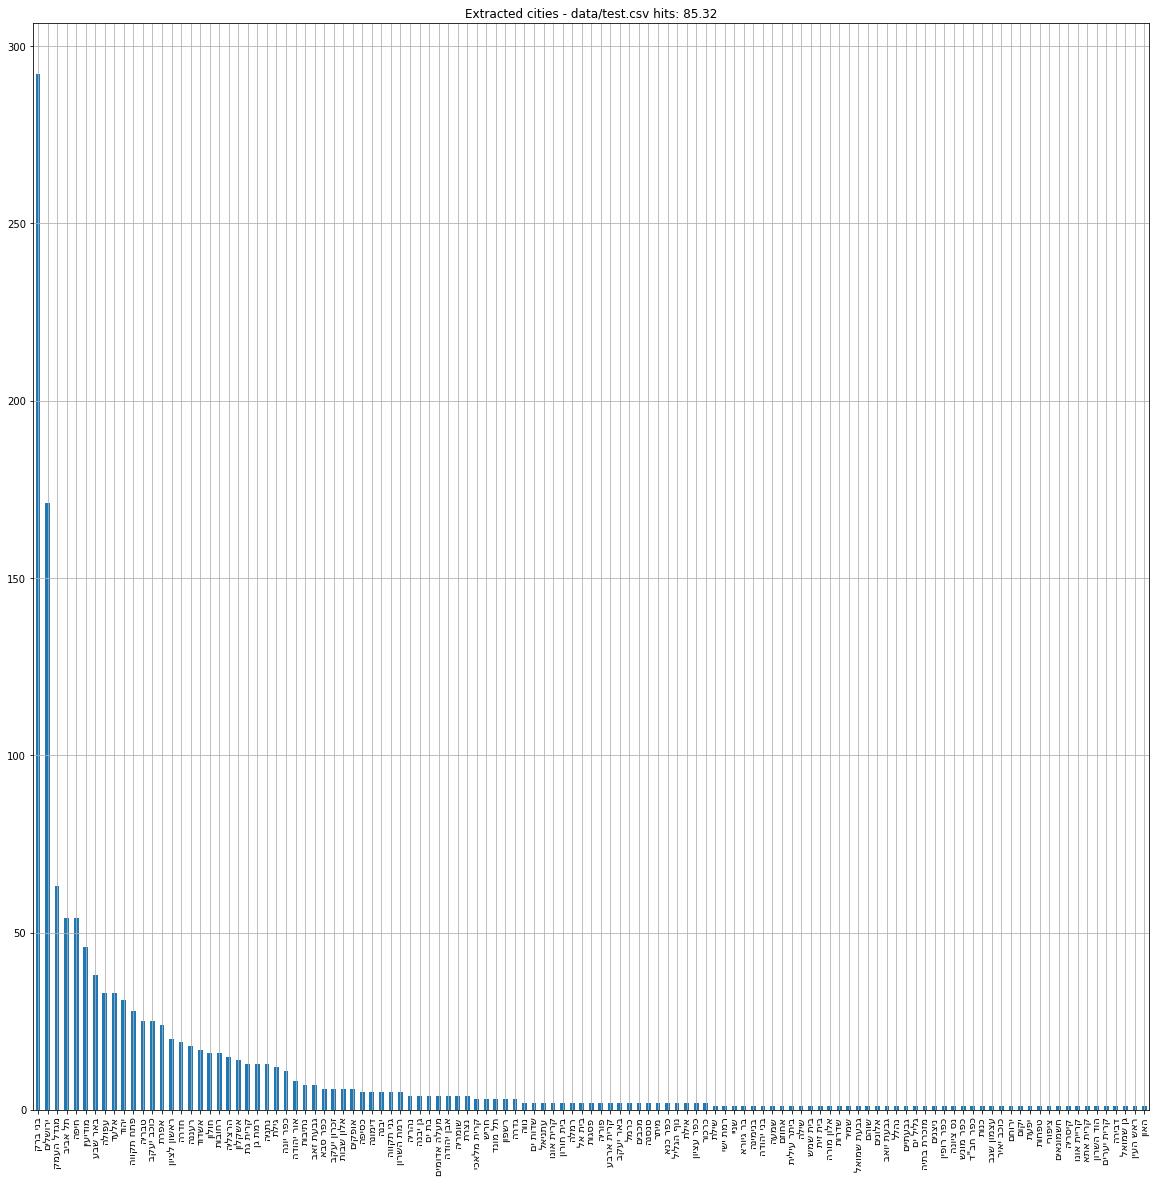

In [23]:
cities_agg_df = pd.get_dummies(df_topics[["city"]]).agg("sum").sort_values(ascending=False)
total_extracted_types = cities_agg_df.sum()
hit_percentage = "{:.2f}".format(total_extracted_types / len(df_topics) * 100)
cities_agg_df.index = pd.Series([x[5:][::-1] for x in cities_agg_df.index.tolist()])
cities_agg_df.plot.bar(grid=True, figsize=(20,20), title="Extracted cities - " + DATA_PATH + " hits: " + hit_percentage)

In [9]:
df_topics[df_topics["city"].isna()].head(100) #failed cities extraction

,place,type,city
4,"אולם ""שבע"" רח' הצפירה 21, ת""א",club,None
5,"ישיבת חב""ד קריית שמואל",yeshiva,None
6,מועדון נוער אור ישראלי,club,None
7,מועדון נוער אור ישראלי,club,None
8,בית חולים וולפסון,hospital,None
...,...,...,...
525,"ישיבת חינוך לנער, צפת",yeshiva,None
527,בית ספר רוגוזין,school,None
529,"סופרמרקט יוחננוף, צומת ביל""ו",grocery,None
547,"מרפאת ""גודפריד"" כללית",pharmacy,None


In [10]:
df_topics[df_topics["type"].isna()].head(100)  #failed type extraction

,place,type,city
10,הרב שמעון וינגר ביהוד,None,יהוד
53,"ארוחת בוקר במלון דן פנורמה, חיפה",None,חיפה
80,בית- קריאת מגילה ואירוע סעודת פורים - גבעת זאב,None,גבעת זאב
90,חניכי ישיבות אישי ישראל - בני ברק,None,בני ברק
91,אישי ישראל - בני ברק,None,בני ברק
...,...,...,...
441,"רח' מעלות דפנה 139, ירושלים",None,ירושלים
444,"קניון איילון- חנויות נייק, אדידס, זארה, REBAR ...",None,רמת גן
445,Chop Shop - תל אביב - יפו,None,None
456,קניון ממילא חנויות זארה ומנגו - ירושלים,None,ירושלים
